# 빅데이터개론2 과제 2

**제출기한 : 2022년 10월 17일 23시 55분**

각 문제를 읽고 주어진 코드셀에 제시된 변수에 결과를 입력하거나, 주어진 텍스트셀에 프로그램 코드 또는 답안을 입력하여 제출하세요.  


아래는 필요한 라이브러리를 불러오는 코드셀입니다. 반드시 숙제를 시작할 때 먼저 실행시키고 문제에서 적절하게 이용하세요.


In [1]:
import math
import numpy as np
import pandas as pd

**다음은 과제의 수행과 제출에 대한 안내입니다.**

- 빅데이터개론2 과제는 모두 Colab의 공유 기능을 이용하여 제출하게 됩니다. 자세한 제출방법은 강의시간(또는 동영상)에 알려줄 것입니다.

- 제출시 노트북의 이름(화일명)에서 성명과 학번을 자신의 이름과 학번으로 바꾼 후에 제출해야 합니다. (예: `빅데이터개론2-과제_2022F_01_홍길동_12345677.ipynb`) 

- 답을 입력하는 셀에 있는 `...`는 지우고 답을 입력하세요.

- 과제 노트북의 복사본을 만들거나 다른 노트북을 생성하여 연습할 것을 강력히 권고합니다. 

- **과제 노트북은 답을 제시하는 코드셀이나 텍스트셀 이외의 내용 또는 순서를 변경하지 마세요.**



## 1. 데이터프레임

**문제 1**

여러분이 사과를 5개, 딸기는 6개, 포도는 10개, 바나나를 11개 가지고 있다고 하자.

이제 여러분이 가지고 있는 과일의 종류과 개수를 각각 열이름 `fruit_name`과 `count` 로 하는 데이터프레임 `df` 을 만드는 코드를 아래 코드셀에서 작성하세요.

In [ ]:
df = pd.DataFrame(
    {'fruit_name' : ['사과', '딸기', '포도', '바나나'],
     'count' : [5, 6, 10, 11]
     })


아래 문제 2- 문제 6 은 데이터프레임 `exam` 을 이용합니다.  

데이터프레임 `exam` 는 3개의 학교(`school`: `A`, `B`, `C`) 에서 학생들이 수학과 언어 과목(`subject`: `math`, `lang`) 중 하나를 선택하여 시험을 본 성적`score` 에 대한 자료이다. 열 `sex` 는 학생의 성별을 나타낸다.  

In [ ]:
exam = pd.DataFrame( {
    'school' : ["A","A","A","A","B","B","B","B","C","C","C","C"],
    'subject' : [ "math","math","lang","lang","math","math","lang","lang","math","math","lang","lang"],
    'score' : [55, 94, 100, 67, 95, 44, 85, 94, 66, 62,66, 65], 
    'sex': ["남자", "여자", "여자", "남자", "남자", "남자", "남자", "여자", "남자", "여자", "남자", "남자"]
    
})
exam

,school,subject,score,sex
0,A,math,55,남자
1,A,math,94,여자
2,A,lang,100,여자
3,A,lang,67,남자
4,B,math,95,남자
5,B,math,44,남자
6,B,lang,85,남자
7,B,lang,94,여자
8,C,math,66,남자
9,C,math,62,여자


**문제 2**

데이터프레임 exam 을 성적(`score`)에 대하여 **내림차순으로 정렬**하여 보여주는 코드를 아레 코드셀에서 작성하시오

In [ ]:
exam.sort_values(['score'], ascending = [False])

,school,subject,score,sex
2,A,lang,100,여자
4,B,math,95,남자
1,A,math,94,여자
7,B,lang,94,여자
6,B,lang,85,남자
3,A,lang,67,남자
8,C,math,66,남자
10,C,lang,66,남자
11,C,lang,65,남자
9,C,math,62,여자


**문제 3**

데이터프레임 `exam` 에서 **언어을 선택한 학생들 중에 시험 점수가  70 점 이하**인 사람만 선택하여 데이터프레임 `exam2` 에 저장하는 코드를 아레 코드셀에서 작성하시오   

In [ ]:
exam2 = exam[(exam['subject'] == 'lang') & (exam['score'] <= 70) ]

**문제 4**

데이터프레임 `exam` 에서 **남자인 사람만 선택**하여 과목(`subject`)과 성적(`score`)으로 구성된 **2개 열**만 가지는 새로운 데이터프레임 `exam3` 를 만드는 코드를 아래 코드 셀에서 작성하시오  

In [ ]:
exam3 = exam.loc[(exam['sex'] == '남자') , ['subject', 'score']]

**문제 5**

데이터프레임 `exam` 에서 남여별(`sex`)로 시험 점수의 최대값을 구하는 코드를 아래 코드 셀에서 작성하시오.  

In [ ]:
exam.groupby(by = ["sex"])[['score']].max()

,score
sex,
남자,95
여자,100


**문제 6**

데이터프레임 `exam` 에서 학교(`school`)와 과목(`subject`)별로  시험 점수의 평균을 구하는 코드를 아래 코드 셀에서 작성하시오  

In [ ]:
exam.groupby(by = ["school", "subject"])[['score']].mean()

score
school subject       
A      lang      83.5
       math      74.5
B      lang      89.5
       math      69.5
C      lang      65.5
       math      64.0

## 2. 경제활동인구, 고용율, 실업율

경제활동인구조사는 국민의 경제활동(취업, 실업, 노동력 등) 특성을 조사함으로써 경제 분석과 인력자원의 개발정책 수립에 필요한 기초 자료를 제공하는 조사이다.

자료 화일 [employment.csv](https://ilovedata.github.io/teaching/bigdata2/data/employment.csv) 에는 2011년에서 2020년까지 우리나라의 15세 이상인구, 경제활동인구와 취업에 대한 남여별  인원수가 천명 단위로 주어져 있다.

각 변수에 대한 설명은 다음과 같다. **인구수가 천명 단위인 것에 유의하자.**

- `year` : 연도
- `pop_15_m` : 남자 15세 이상인구(천명)
- `pop_15_f` : 여자 15세 이상인구(천명)
- `pop_eco_m` : 남자 경제활동인구(취업자+실업자)(천명)
- `pop_eco_f` : 여자 경제활동인구(취업자+실업자) (천명)
- `emp_m` : 남자 취업자 (천명)
- `emp_f` : 여자 취업자 (천명)

경제활동인구는 만 15세 이상 인구 중 취업자와 실업자를 말한다. 

아래 코드를 실행해서 [employment.csv](https://ilovedata.github.io/teaching/bigdata2/data/employment.csv) 에 있는 자료를 데이터프레임 `employ` 에 저장하자.

In [ ]:
url = "https://ilovedata.github.io/teaching/bigdata2/data/employment.csv"
employ = pd.read_csv(url, encoding="CP949")

In [ ]:
employ

,year,pop15_m,pop15_f,popeco_m,popeco_f,emp_m,emp_f
0,2011,20269,21119,14869,10520,14333,10193
1,2012,20501,21356,15077,10704,14568,10387
2,2013,20728,21576,15245,10862,14745,10554
3,2014,20989,21806,15607,11229,15057,10840
4,2015,21222,22018,15728,11426,15156,11022
5,2016,21401,22205,15836,11583,15241,11168
6,2017,21573,22357,15975,11773,15368,11356
7,2018,21699,22484,16002,11893,15372,11450
8,2019,21886,22618,16090,12097,15463,11660
9,2020,22035,22750,16005,12007,15381,11523


**문제 1**

고용율는 취업자가 전체 15세 이상인구에서 차지하는 비율을 말한다.

고용율(%) = (취업자 / 전체 15세 이상인구) * 100

**연도별 남자와 여자의 고용율** 을 각각 열이름 `employ_rate_m` 과 `employ_rate_f` 로 데이터프레임 `employ`에  추가하는 코드를 아래 코드셀에서 작성하시오. 

In [ ]:
employ["employ_rate_m"] = (employ.emp_m/ employ.pop15_m) * 100
employ["employ_rate_f"] = (employ.emp_f/ employ.pop15_f) * 100

**문제 2**

데이터프레임 `employ` 는 모든 인구가 남여로 나누어져 있다. 다음과 같이 남여를 합한 열들을 데이터프레임 `employ`에 새로 추가하는 코드를 아래 코드셀에 작성하시오.

- `popeco` : 전체 경제활동인구(취업자+실업자)(천명)
- `emp` : 전체 취업자 (천명)


In [ ]:
employ["popeco"] = employ.popeco_m + employ.popeco_f
employ["emp"] = employ.emp_m + employ.emp_f

**문제 3**

실업율(`unemploy_rate`)는 실업자가 전체 경제활동인구(취업자+실업자)에서 차지하는 비율을 말한다.

경제활동인구 = 취업자 + 실업자

실업율(%) = (실업자 / 경제활동인구) * 100

**연도별 전체 실업율** 을 열이름 `unemploy_rate` 로 데이터프레임 `employ`에  추가하는 코드를 아래 코드셀에서 작성하시오. 

In [ ]:
employ["unemploy_rate"] = ((employ.popeco - employ.emp)/ employ.popeco) * 100

**문제 4**

데이터프레임 `employ` 에서 2018년-2020년의 자료만 선택하여 데이터프레임 `employ2`를 만드는 코드를 아래 코드 셀에 작성하시오.
 


In [ ]:
employ2 = employ[employ['year'].isin([2018,2019,2020])]

**문제 5**

교과서에서 사용된 우리나라 가구수 자료를 다음과 같이 데이터프레임 `house`로 저장하자.

데이터프레임 `house` 의 열이름에 대한 정보는 [온라인 강의노트](https://uos-bigdata.github.io/bigdatabook/chapters/04/dataframe-change.html#id8) 를 참조하세요

In [3]:
url2 = "https://ilovedata.github.io/teaching/bigdata2/data/house_final.csv"
house = pd.read_csv(url2, encoding="utf-8")

In [ ]:
house

,year,region,p1,p2,p3,p4,p5,p6,p7plus
0,2015,서울특별시,1115744,930467,817440,701945,169436,38547,10911
1,2015,부산광역시,361749,366048,296742,238031,56971,12928,3431
2,2015,대구광역시,239517,239824,208795,184258,44071,9582,2481
3,2015,인천광역시,243678,265079,245135,220538,55230,12253,3504
4,2015,광주광역시,163577,137662,115701,109612,32199,6647,1759
...,...,...,...,...,...,...,...,...,...
97,2020,전라북도,255269,233334,134414,96907,27962,5920,1769
98,2020,전라남도,256633,251506,131372,87883,26561,5727,1836
99,2020,경상북도,388791,363061,202539,137092,32174,6388,1774
100,2020,경상남도,417737,399700,270061,205658,46516,8410,2073


데이터프레임 `house` 를 이용하여 연도별 총가구를 구하고 연도(`year`) 와 총가구수(`totsl_house`)를 열로 가진 새로운 데이터프레임 `house2`를 만드는 코드를 아래 코드셀에 작성히시오.

In [5]:
house_year = house.groupby(by = 'year').sum()
house_year["totsl_house"] = house_year[['p1','p2','p3','p4','p5','p6','p7plus']].sum(axis = 1)
house_year = house_year.reset_index()
house2 = house_year[['year', 'totsl_house']]

,year,totsl_house
0,2015,19111030
1,2016,19367696
2,2017,19673875
3,2018,19979188
4,2019,20343188
5,2020,20926710


**문제 6**

1. 경제활동인구의 정보가 저장된  데이터프레임 `employ` 와 가구수 데이터프레임 `house2` 을 연도(`year`)를 기준으로 결합(merge)한 새로운 데이터프레임 `combine` 을 만들고
2. 연도별로  **가구당 평균 취업자수**를 가진 열 `employ_per_house` 를  데이터프레임 `combine`에 추가하는 코드를 아래 코드셀에 작성하시오.

> 가구당 평균 취업자수 = 총 취업자 수 / 총 가구 수

**주의: 원래 데이터프레임 `employ` 에서 취업자수의 단위는 천명(1000명)이다.** 따라서 가구당 평균 취업자수를 계산할 경우 이를 고려해야 한다.


In [ ]:
#1
combine = pd.merge(employ, house2, on = "year")
#2
combine["employ_per_house"] = (combine.emp * 1000)/combine.totsl_house

## 재미로 해보기

아래 코드는 과제와 관계가 없습니다. 여러분이 앞에서 과제를 잘 수행하였으면 남여별 고용율이 시간에 따라서 어떻게 변화하는지 아래 코드를 실행하면 알 수 있습니다. 

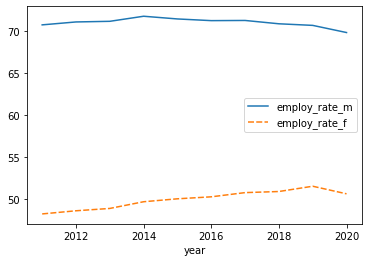

In [ ]:
import seaborn as sns

df_plot = employ[ ['year','employ_rate_m', 'employ_rate_f']].set_index('year')

sns.lineplot(data=df_plot)